In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [183]:
df = pd.read_csv("EncashmentData.csv")

In [184]:
df 

,Date of\nEncashment,Name of the Political Party,Denomination
0,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
1,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
2,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10000000.0
3,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
4,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
...,...,...,...
20841,24-Jan-24,JANASENA PARTY,1000000.0
20842,24-Jan-24,JANASENA PARTY,1000000.0
20843,24-Jan-24,JANASENA PARTY,1000000.0
20844,24-Jan-24,JANASENA PARTY,1000000.0


In [185]:
df.head(10)

,Date of\nEncashment,Name of the Political Party,Denomination
0,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
1,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
2,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10000000.0
3,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
4,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
5,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
6,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
7,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
8,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0
9,12-Apr-19,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000.0


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20846 entries, 0 to 20845
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date of
Encashment           20421 non-null  object 
 1   Name of the Political Party  20421 non-null  object 
 2   Denomination                 20421 non-null  float64
dtypes: float64(1), object(2)
memory usage: 488.7+ KB


In [187]:
df.columns

Index(['Date of\nEncashment', 'Name of the Political Party', 'Denomination'], dtype='object')

In [188]:
df['Name of the Political Party'].value_counts()

Name of the Political Party
BHARTIYA JANTA PARTY                              8633
ALL INDIA TRINAMOOL CONGRESS                      3305
PRESIDENT, ALL INDIA CONGRESS COMMITTEE           3146
BHARAT RASHTRA SAMITHI                            1806
BIJU JANATA DAL                                    861
DMK PARTY IN PARLIAMENT                            648
YSR CONGRESS PARTY (YUVAJANA SRAMIKA R             472
SHIVSENA (POLITICAL PARTY)                         354
TELUGU DESAM PARTY                                 279
AAM AADMI PARTY                                    245
RASTRIYA JANTA DAL                                 149
NATIONALIST CONGRESS PARTY PARLIAMENT OF           116
JANATA DAL ( SECULAR )                              75
SIKKIM KRANTIKARI MORCHA                            50
ADYAKSHA SAMAJVADI PARTY                            46
JHARKHAND MUKTI MORCHA                              45
JANASENA PARTY                                      39
ALL INDIA ANNA DRAVIDA MUNNETRA KAZHA

In [189]:
top_10 = df['Name of the Political Party'].value_counts().head(10)
top_10

Name of the Political Party
BHARTIYA JANTA PARTY                       8633
ALL INDIA TRINAMOOL CONGRESS               3305
PRESIDENT, ALL INDIA CONGRESS COMMITTEE    3146
BHARAT RASHTRA SAMITHI                     1806
BIJU JANATA DAL                             861
DMK PARTY IN PARLIAMENT                     648
YSR CONGRESS PARTY (YUVAJANA SRAMIKA R      472
SHIVSENA (POLITICAL PARTY)                  354
TELUGU DESAM PARTY                          279
AAM AADMI PARTY                             245
Name: count, dtype: int64

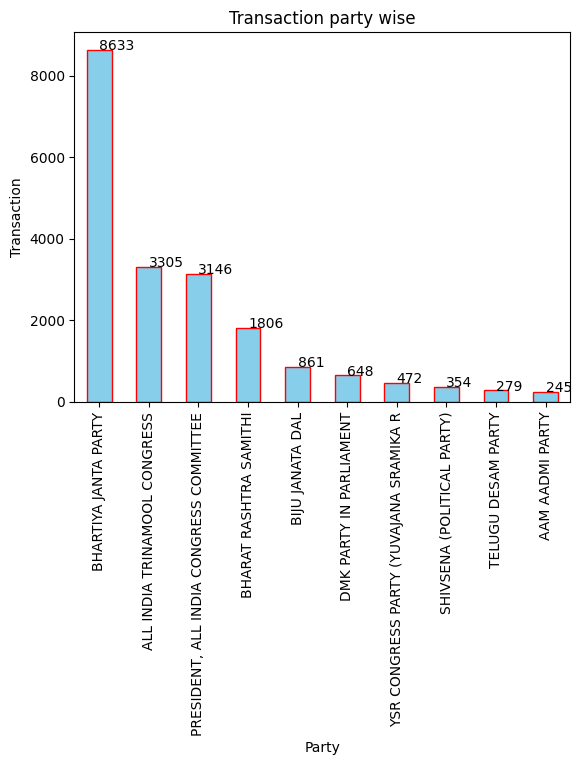

In [190]:
ax= top_10.plot(kind = "bar", color = 'skyblue', edgecolor = 'red' )
plt.title('Transaction party wise')
plt.xlabel('Party')
plt.ylabel('Transaction')
for i, v in enumerate(top_10):
    ax.text(i, v, str(v))

plt.show()

### How much Amount top 3 parties got in total?

In [191]:
top_3 = df['Name of the Political Party'].value_counts().head(3).index

In [192]:
top_3

Index(['BHARTIYA JANTA PARTY', 'ALL INDIA TRINAMOOL CONGRESS',
       'PRESIDENT, ALL INDIA CONGRESS COMMITTEE'],
      dtype='object', name='Name of the Political Party')

In [193]:
top_3_parties = df[df['Name of the Political Party'].isin(top_3)]
top_3_parties

,Date of\nEncashment,Name of the Political Party,Denomination
61,12-Apr-19,BHARTIYA JANTA PARTY,1000000.0
62,12-Apr-19,BHARTIYA JANTA PARTY,1000000.0
63,12-Apr-19,BHARTIYA JANTA PARTY,1000000.0
64,12-Apr-19,BHARTIYA JANTA PARTY,1000000.0
65,12-Apr-19,BHARTIYA JANTA PARTY,10000000.0
...,...,...,...
20831,24-Jan-24,BHARTIYA JANTA PARTY,10000000.0
20832,24-Jan-24,BHARTIYA JANTA PARTY,10000000.0
20833,24-Jan-24,BHARTIYA JANTA PARTY,10000000.0
20834,24-Jan-24,BHARTIYA JANTA PARTY,10000000.0


<Axes: ylabel='count'>

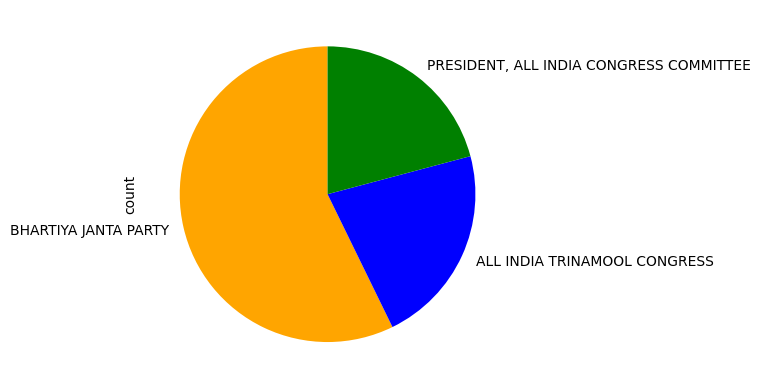

In [194]:
colors = ['orange','blue','green']
top_3_parties['Name of the Political Party'].value_counts().plot(kind='pie', colors=colors, startangle=90)

In [195]:
total = top_3_parties.groupby('Name of the Political Party')['Denomination'].sum()

In [196]:
f"The total amount of top3 parties: ", total

('The total amount of top3 parties: ',
 Name of the Political Party
 ALL INDIA TRINAMOOL CONGRESS               1.609531e+10
 BHARTIYA JANTA PARTY                       6.060511e+10
 PRESIDENT, ALL INDIA CONGRESS COMMITTEE    1.421866e+10
 Name: Denomination, dtype: float64)

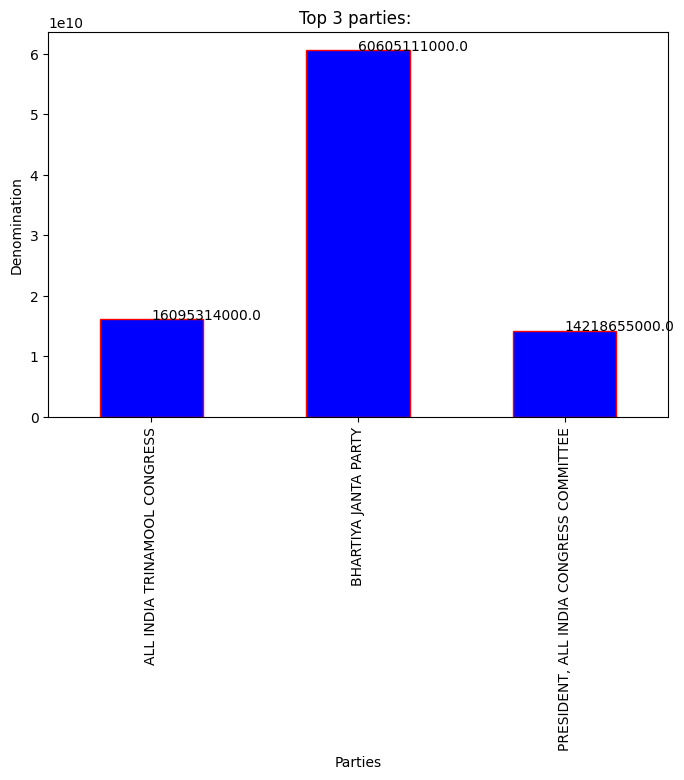

In [197]:
ax = total.plot(kind = 'bar', color = 'blue', edgecolor = 'red', figsize= (8,5))
plt.title("Top 3 parties: ")
plt.xlabel('Parties')
plt.ylabel('Denomination')
for i, v in enumerate(total):
    ax.text(i, v, str(v))

.Which date they got their first payment?

In [198]:
top_3_parties.groupby('Name of the Political Party')['Date of\nEncashment'].min()

Name of the Political Party
ALL INDIA TRINAMOOL CONGRESS               01-Feb-23
BHARTIYA JANTA PARTY                       01-Dec-23
PRESIDENT, ALL INDIA CONGRESS COMMITTEE    05-Oct-21
Name: Date of\nEncashment, dtype: object

which date they got their highest payment?

In [199]:
maxPay = top_3_parties.groupby('Name of the Political Party')['Denomination'].idxmax()
maxPay

Name of the Political Party
ALL INDIA TRINAMOOL CONGRESS               787
BHARTIYA JANTA PARTY                        65
PRESIDENT, ALL INDIA CONGRESS COMMITTEE    472
Name: Denomination, dtype: int64

In [200]:
date = top_3_parties.loc[maxPay]
date

,Date of\nEncashment,Name of the Political Party,Denomination
787,16-Apr-19,ALL INDIA TRINAMOOL CONGRESS,10000000.0
65,12-Apr-19,BHARTIYA JANTA PARTY,10000000.0
472,12-Apr-19,"PRESIDENT, ALL INDIA CONGRESS COMMITTEE",10000000.0


.which party got highest amount?

In [201]:
x = top_3_parties.groupby('Name of the Political Party')['Denomination'].sum().idxmax()
y = top_3_parties.groupby('Name of the Political Party')['Denomination'].sum().max()
x, y

('BHARTIYA JANTA PARTY', 60605111000.0)

Make the party names in short form like BJP,AITC etc?

In [202]:
df.groupby('Name of the Political Party')['Denomination'].idxmax()

Name of the Political Party
AAM AADMI PARTY                                    4005
ADYAKSHA SAMAJVADI PARTY                           3109
ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM              2
ALL INDIA TRINAMOOL CONGRESS                        787
BHARAT RASHTRA SAMITHI                               33
BHARTIYA JANTA PARTY                                 65
BIHAR PRADESH JANTA DAL(UNITED)                    1085
BIJU JANATA DAL                                    4326
DMK PARTY IN PARLIAMENT                             653
GOA FORWARD PARTY                                  8965
JAMMU AND KASHMIR NATIONAL CONFERENCE              3028
JANASENA PARTY                                    12181
JANATA DAL ( SECULAR )                            15145
JHARKHAND MUKTI MORCHA                            14372
MAHARASHTRAWADI GOMNTAK PARTY                      9982
NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH     4384
NATIONALIST CONGRESS PARTY PARLIAMENT OF           4361
PRESIDENT, ALL INDIA

In [203]:
new_name = {
'AAM AADMI PARTY' : 'A A M',
'ADYAKSHA SAMAJVADI PARTY' : 'ASP',
'ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM' : 'AIADMK',
'ALL INDIA TRINAMOOL CONGRESS' : 'AITC',
'BHARAT RASHTRA SAMITHI' : 'BRS',
'BHARTIYA JANTA PARTY' : 'BJP',
'BIHAR PRADESH JANTA DAL(UNITED)' : 'BPJD',
'BIJU JANATA DAL ' : 'BJD',
'DMK PARTY IN PARLIAMENT' : 'DPP',
'GOA FORWARD PARTY ' : 'GFP',
'JAMMU AND KASHMIR NATIONAL CONFERENCE' : 'J&KNC',
'JANASENA PARTY' : 'JP',
'JANATA DAL ( SECULAR )' : 'JD (SECULAR)',
'JHARKHAND MUKTI MORCHA ' : 'JMM',
'MAHARASHTRAWADI GOMNTAK PARTY' : 'MGP',
'NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH' : 'NCPMP',
'NATIONALIST CONGRESS PARTY PARLIAMENT OF' : 'NCPP',
'PRESIDENT, ALL INDIA CONGRESS COMMITTEE' : 'AICC',
'RASHTRIYA JANTA DAL' : 'RJD',
'RASTRIYA JANTA DAL' : 'RJD',
'SHIROMANI AKALI DAL' : 'SAD',
'SHIVSENA' : 'SVS',
'SHIVSENA (POLITICAL PARTY)' : 'SVS(PC)',
'SIKKIM DEMOCRATIC FRONT' : 'SDF',
'SIKKIM KRANTIKARI MORCHA' : 'SKM',
'TELUGU DESAM PARTY' : 'TDP', 
'YSR CONGRESS PARTY (YUVAJANA SRAMIKA R': 'YSR CP'
}

In [204]:
df ['Name of the Political Party'] = df['Name of the Political Party'].map(new_name)

In [205]:
df['Name of the Political Party'].value_counts()

Name of the Political Party
BJP             8633
AITC            3305
AICC            3146
BRS             1806
DPP              648
YSR CP           472
SVS(PC)          354
TDP              279
A A M            245
RJD              150
NCPP             116
JD (SECULAR)      75
SKM               50
ASP               46
JP                39
AIADMK            38
SAD               33
MGP               28
BPJD              14
SDF               10
NCPMP              5
J&KNC              5
SVS                1
Name: count, dtype: int64

In which date the highest transaction happend and how many transactiins has been done on that date...print the date also?

In [206]:
transaction_totals = df.groupby('Date of\nEncashment')['Denomination'].sum()
transaction_totals

Date of\nEncashment
01-Dec-23    1.300000e+07
01-Feb-23    6.700000e+08
02-Dec-23    2.500000e+08
02-Feb-23    2.500000e+07
02-May-19    2.010000e+07
                 ...     
29-Oct-20    2.400000e+08
30-Apr-19    3.800000e+06
30-Jan-23    1.405000e+09
31-Jan-23    1.305000e+08
31-Oct-20    2.000000e+07
Name: Denomination, Length: 230, dtype: float64

In [207]:
date_highest_transaction = transaction_totals.idxmax()
date_highest_transaction

'10-May-19'

In [208]:
transaction_on_date = df[df['Date of\nEncashment']== date_highest_transaction].shape[0]
transaction_on_date

512

The top 3 parties...print their denominations like BJP > 1Lakh -> 30, 10lakh >50

In [ ]:
top_3_parties['Name of the Political Party'].value_counts()

Name of the Political Party
BHARTIYA JANTA PARTY                       8633
ALL INDIA TRINAMOOL CONGRESS               3305
PRESIDENT, ALL INDIA CONGRESS COMMITTEE    3146
Name: count, dtype: int64

In [ ]:
b1 = top_3_parties[(top_3_parties['Denomination'] == 100000) & (top_3_parties['Name of the Political Party']=='BHARTIYA JANTA PARTY')].shape[0]

In [ ]:
b2 = top_3_parties[(top_3_parties['Denomination'] == 1000000) & (top_3_parties['Name of the Political Party'] == 'BHARTIYA JANTA PARTY')].shape[0]

In [ ]:
t1 = top_3_parties[(top_3_parties['Denomination'] == 100000) & (top_3_parties['Name of the Political Party'] == 'ALL INDIA TRINAMOOL CONGRESS')].shape[0]

In [ ]:
t2 = top_3_parties[(top_3_parties['Denomination'] == 1000000) & (top_3_parties['Name of the Political Party'] == 'ALL INDIA TRINAMOOL CONGRESS')].shape[0]

In [ ]:
c1 = top_3_parties[(top_3_parties['Denomination'] == 100000) & (top_3_parties['Name of the Political Party'] == 'PRESIDENT, ALL INDIA CONGRESS COMMITTEE')].shape[0]

In [ ]:
c2 = top_3_parties[(top_3_parties['Denomination'] == 1000000) & (top_3_parties['Name of the Political Party'] == 'PRESIDENT, ALL INDIA CONGRESS COMMITTEE')].shape[0]

In [ ]:
f'''BJP > 1Lakh -> {b1}, 10lakh ->{b2}
AITC > 1Lakh -> {t1}, 10lakh ->{t2}
PAICC > 1Lakh -> {c1}, 10lakh ->{c2}'''

'BJP > 1Lakh -> 706, 10lakh ->1994\nAITC > 1Lakh -> 410, 10lakh ->1384\nPAICC > 1Lakh -> 800, 10lakh ->958'

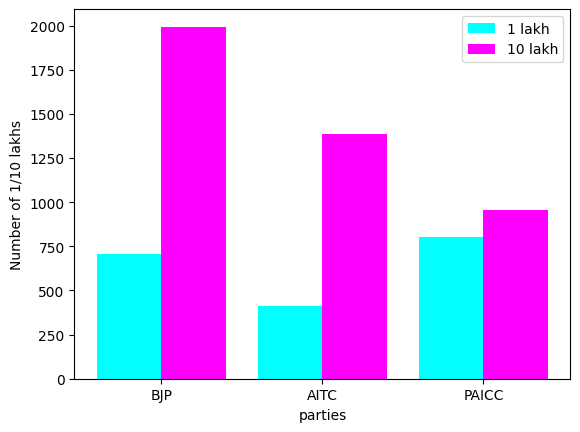

In [ ]:
x = ['BJP', 'AITC', 'PAICC']
y = [b1, t1, c1]
z = [b2, t2, c2]

X_axis = np.arange(len(x))
plt.bar(X_axis - 0.2, y, 0.4, label = '1 lakh', color = 'cyan') 
plt.bar(X_axis + 0.2, z, 0.4, label = '10 lakh', color = 'magenta')

plt.xticks(X_axis, x)
plt.xlabel('parties')
plt.ylabel('Number of 1/10 lakhs')
plt.legend()

In which date there was least no of transaction has been done?

In [ ]:
least_trans_date = df.groupby('Date of\nEncashment')['Denomination'].value_counts().idxmin()
least_trans_date

('01-Dec-23', 10000000.0)

In [ ]:
least_trans =  df.groupby('Date of\nEncashment')['Denomination'].value_counts().min()
least_trans

1

In which date, the higest amount has been donated?

In [ ]:
df.groupby('Date of\nEncashment')['Denomination'].sum().idxmax()

'10-May-19'

In [ ]:
df.groupby('Date of\nEncashment')['Denomination'].sum().max()

4116500000.0

change date format to dd/mm/yyyy. ex 03-apr-19 > 03/04/2019

In [ ]:
df['Date of\nEncashment'] = pd.to_datetime(df['Date of\nEncashment'])

C:\Users\SAYAN\AppData\Local\Temp\ipykernel_4236\3404798734.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date of\nEncashment'] = pd.to_datetime(df['Date of\nEncashment'])


In [ ]:
df['Date of\nEncashment'] = df['Date of\nEncashment'].dt.strftime('%d/%m/%Y')

In [ ]:
df.head(10)

,Date of\nEncashment,Name of the Political Party,Denomination
0,12/04/2019,AIADMK,1000000.0
1,12/04/2019,AIADMK,1000000.0
2,12/04/2019,AIADMK,10000000.0
3,12/04/2019,AIADMK,1000000.0
4,12/04/2019,AIADMK,1000000.0
5,12/04/2019,AIADMK,1000000.0
6,12/04/2019,AIADMK,1000000.0
7,12/04/2019,AIADMK,1000000.0
8,12/04/2019,AIADMK,1000000.0
9,12/04/2019,AIADMK,1000000.0
